In [90]:
#pip install statsmodels

In [91]:
#imports
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from scipy import stats
import statsmodels.api as sm


In [92]:
df = pd.read_csv('Singles_Game_Attendance.csv')
df = df.drop(columns=['Unnamed: 0'])
df

,EVENT_DATE,Attendance_Count,Sales_Count,AttendancePercentage,DAY,max_temp,min_temp,avgtemp,Rain,Snow,Condition,Weather,Temp,Temp_Diff,Promotions/Events
0,2024-04-02,1956,2750,71.13,Tue,41.9,36.5,39.9,100,0,Rain,CLOUDY,52,12,0
1,2024-04-05,485,590,82.20,Fri,37.5,28.3,33.0,0,100,Snow,CLOUDY,41,8,0
2,2024-04-06,510,637,80.06,Sat,39.6,33.4,36.2,0,100,Snow,OVERCAST,42,6,WooSox Tumbler Giveaway / Fireworks / Clinton ...
3,2024-04-07,560,621,90.18,Sun,41.4,33.2,36.8,0,100,Snow,CLOUDY,42,5,Meet the Team Party / Sports Memorabilia Day /...
4,2024-04-16,1079,1160,93.02,Tue,58.4,41.4,49.0,0,0,Cloudy,PARTLY CLOUDY,64,15,Sunday Funday / Kids Run the Bases / Bark in t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2024-09-11,627,729,86.01,Wed,74.1,50.8,61.4,0,0,Sunny,CLEAR,74,13,Fan Appreciation Week / Taco & Tequila Tuesday...
69,2024-09-12,767,979,78.35,Thu,76.9,53.7,63.8,0,0,Cloudy,CLEAR,76,12,Fan Appreciation Week / Batting Practice / Pre...
70,2024-09-13,2111,2729,77.35,Fri,80.9,56.0,67.6,100,0,Sunny,CLEAR,81,13,Fan Appreciation Week / Batting Practice / Thr...
71,2024-09-14,2492,3126,79.72,Sat,80.3,60.6,68.8,0,0,Cloudy,SUNNY,80,11,Fan Appreciation Week / Batting Practice / Pre...


In [93]:
test1_df = df.groupby(by='Condition').size().reset_index(name='Condition_Count')
test1_df

,Condition,Condition_Count
0,Cloudy,13
1,Fog,14
2,Rain,38
3,Snow,3
4,Sunny,5


In [94]:
test_df = pd.get_dummies(df, columns=['Condition'], dtype=float)
test_df

,EVENT_DATE,Attendance_Count,Sales_Count,AttendancePercentage,DAY,max_temp,min_temp,avgtemp,Rain,Snow,Weather,Temp,Temp_Diff,Promotions/Events,Condition_Cloudy,Condition_Fog,Condition_Rain,Condition_Snow,Condition_Sunny
0,2024-04-02,1956,2750,71.13,Tue,41.9,36.5,39.9,100,0,CLOUDY,52,12,0,0.0,0.0,1.0,0.0,0.0
1,2024-04-05,485,590,82.20,Fri,37.5,28.3,33.0,0,100,CLOUDY,41,8,0,0.0,0.0,0.0,1.0,0.0
2,2024-04-06,510,637,80.06,Sat,39.6,33.4,36.2,0,100,OVERCAST,42,6,WooSox Tumbler Giveaway / Fireworks / Clinton ...,0.0,0.0,0.0,1.0,0.0
3,2024-04-07,560,621,90.18,Sun,41.4,33.2,36.8,0,100,CLOUDY,42,5,Meet the Team Party / Sports Memorabilia Day /...,0.0,0.0,0.0,1.0,0.0
4,2024-04-16,1079,1160,93.02,Tue,58.4,41.4,49.0,0,0,PARTLY CLOUDY,64,15,Sunday Funday / Kids Run the Bases / Bark in t...,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2024-09-11,627,729,86.01,Wed,74.1,50.8,61.4,0,0,CLEAR,74,13,Fan Appreciation Week / Taco & Tequila Tuesday...,0.0,0.0,0.0,0.0,1.0
69,2024-09-12,767,979,78.35,Thu,76.9,53.7,63.8,0,0,CLEAR,76,12,Fan Appreciation Week / Batting Practice / Pre...,1.0,0.0,0.0,0.0,0.0
70,2024-09-13,2111,2729,77.35,Fri,80.9,56.0,67.6,100,0,CLEAR,81,13,Fan Appreciation Week / Batting Practice / Thr...,0.0,0.0,0.0,0.0,1.0
71,2024-09-14,2492,3126,79.72,Sat,80.3,60.6,68.8,0,0,SUNNY,80,11,Fan Appreciation Week / Batting Practice / Pre...,1.0,0.0,0.0,0.0,0.0


In [95]:
# Define features (X) and target variable (y)
X = test_df[['Sales_Count','max_temp', 'Condition_Cloudy', 'Condition_Fog', 'Condition_Sunny', 'Condition_Rain', 'Condition_Snow']]
y = test_df['Attendance_Count']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Coefficients of the model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 24511.448567799016
R-squared: 0.949250438581934
Coefficients: [  0.84647558  -1.61996655 -84.61343402  30.42509196  70.25582842
  22.90318169 -38.97066804]
Intercept: 99.86372327844765


In [96]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:       Attendance_Count   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     520.8
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           1.49e-53
Time:                        14:09:11   Log-Likelihood:                -457.02
No. Observations:                  73   AIC:                             928.0
Df Residuals:                      66   BIC:                             944.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               41.7947     80.403  

In [97]:
X = test_df['Sales_Count']
y = test_df['Attendance_Count']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:       Attendance_Count   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     3283.
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           3.49e-61
Time:                        14:09:11   Log-Likelihood:                -457.87
No. Observations:                  73   AIC:                             919.7
Df Residuals:                      71   BIC:                             924.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          13.7906     29.413      0.469      

In [98]:
sales_df = pd.read_csv('Sales+AttenadanceCounts24.csv', index_col=False)
sales_df = sales_df.drop(columns=['Unnamed: 0', 'Sales_Packages_Count_y', 'Attendance_Packages_Count_y'])
sales_df = sales_df.rename(columns={'Sales_Packages_Count_x' : 'Sales_Packages_Count' , 'Attendance_Packages_Count_x' : 'Attendance_Packages_Count'})
sales_df

KeyError: "['Sales_Packages_Count_y', 'Attendance_Packages_Count_y'] not found in axis"

In [61]:
test2_df = pd.merge(df, sales_df, how='inner', left_on='EVENT_DATE', right_on='EVENT_USAGE_DATE')
test2_df

,EVENT_DATE,Attendance_Count,Sales_Count,AttendancePercentage,DAY,max_temp,min_temp,avgtemp,Rain,Snow,...,Temp_Diff,Promotions/Events,Unnamed: 0,EVENT_USAGE_DATE,Sales_Singles_Count,Attendance_Singles_Count,Sales_Groups_Count,Attendance_Groups_Count,Sales_Packages_Count,Attendance_Packages_Count
0,2024-04-02,1956,2750,71.13,Tue,41.9,36.5,39.9,100,0,...,12,0,0,2024-04-02,2750,1956,847,293,2824,1329
1,2024-04-05,485,590,82.20,Fri,37.5,28.3,33.0,0,100,...,8,0,1,2024-04-05,590,485,686,359,2733,773
2,2024-04-06,510,637,80.06,Sat,39.6,33.4,36.2,0,100,...,6,WooSox Tumbler Giveaway / Fireworks / Clinton ...,2,2024-04-06,637,510,354,254,2689,712
3,2024-04-07,560,621,90.18,Sun,41.4,33.2,36.8,0,100,...,5,Meet the Team Party / Sports Memorabilia Day /...,3,2024-04-07,621,560,446,388,2844,1009
4,2024-04-16,1079,1160,93.02,Tue,58.4,41.4,49.0,0,0,...,15,Sunday Funday / Kids Run the Bases / Bark in t...,4,2024-04-16,1160,1079,135,84,2624,1273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2024-09-11,627,729,86.01,Wed,74.1,50.8,61.4,0,0,...,13,Fan Appreciation Week / Taco & Tequila Tuesday...,68,2024-09-11,729,627,977,534,2811,945
69,2024-09-12,767,979,78.35,Thu,76.9,53.7,63.8,0,0,...,12,Fan Appreciation Week / Batting Practice / Pre...,69,2024-09-12,979,767,1821,1013,2725,1082
70,2024-09-13,2111,2729,77.35,Fri,80.9,56.0,67.6,100,0,...,13,Fan Appreciation Week / Batting Practice / Thr...,70,2024-09-13,2729,2111,2484,1437,2830,1577
71,2024-09-14,2492,3126,79.72,Sat,80.3,60.6,68.8,0,0,...,11,Fan Appreciation Week / Batting Practice / Pre...,71,2024-09-14,3126,2492,2151,1255,2672,1393


In [62]:
test2_df['Sales_Count'] = test2_df['Sales_Singles_Count'] + test2_df['Sales_Groups_Count'] + test2_df['Sales_Packages_Count']
test2_df['Attendance_Count'] = test2_df['Attendance_Singles_Count'] + test2_df['Attendance_Groups_Count'] + test2_df['Attendance_Packages_Count']
test2_df['AttendancePercentage'] = test2_df['Attendance_Count'] / test2_df['Sales_Count']
test2_df['AttendancePercentage'] = test2_df['AttendancePercentage'].round(2)

test2_df

,EVENT_DATE,Attendance_Count,Sales_Count,AttendancePercentage,DAY,max_temp,min_temp,avgtemp,Rain,Snow,...,Temp_Diff,Promotions/Events,Unnamed: 0,EVENT_USAGE_DATE,Sales_Singles_Count,Attendance_Singles_Count,Sales_Groups_Count,Attendance_Groups_Count,Sales_Packages_Count,Attendance_Packages_Count
0,2024-04-02,3578,6421,0.56,Tue,41.9,36.5,39.9,100,0,...,12,0,0,2024-04-02,2750,1956,847,293,2824,1329
1,2024-04-05,1617,4009,0.40,Fri,37.5,28.3,33.0,0,100,...,8,0,1,2024-04-05,590,485,686,359,2733,773
2,2024-04-06,1476,3680,0.40,Sat,39.6,33.4,36.2,0,100,...,6,WooSox Tumbler Giveaway / Fireworks / Clinton ...,2,2024-04-06,637,510,354,254,2689,712
3,2024-04-07,1957,3911,0.50,Sun,41.4,33.2,36.8,0,100,...,5,Meet the Team Party / Sports Memorabilia Day /...,3,2024-04-07,621,560,446,388,2844,1009
4,2024-04-16,2436,3919,0.62,Tue,58.4,41.4,49.0,0,0,...,15,Sunday Funday / Kids Run the Bases / Bark in t...,4,2024-04-16,1160,1079,135,84,2624,1273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2024-09-11,2106,4517,0.47,Wed,74.1,50.8,61.4,0,0,...,13,Fan Appreciation Week / Taco & Tequila Tuesday...,68,2024-09-11,729,627,977,534,2811,945
69,2024-09-12,2862,5525,0.52,Thu,76.9,53.7,63.8,0,0,...,12,Fan Appreciation Week / Batting Practice / Pre...,69,2024-09-12,979,767,1821,1013,2725,1082
70,2024-09-13,5125,8043,0.64,Fri,80.9,56.0,67.6,100,0,...,13,Fan Appreciation Week / Batting Practice / Thr...,70,2024-09-13,2729,2111,2484,1437,2830,1577
71,2024-09-14,5140,7949,0.65,Sat,80.3,60.6,68.8,0,0,...,11,Fan Appreciation Week / Batting Practice / Pre...,71,2024-09-14,3126,2492,2151,1255,2672,1393


In [63]:
test2_df = pd.get_dummies(test2_df, columns=['Condition'], dtype=float)
test2_df

,EVENT_DATE,Attendance_Count,Sales_Count,AttendancePercentage,DAY,max_temp,min_temp,avgtemp,Rain,Snow,...,Attendance_Singles_Count,Sales_Groups_Count,Attendance_Groups_Count,Sales_Packages_Count,Attendance_Packages_Count,Condition_Cloudy,Condition_Fog,Condition_Rain,Condition_Snow,Condition_Sunny
0,2024-04-02,3578,6421,0.56,Tue,41.9,36.5,39.9,100,0,...,1956,847,293,2824,1329,0.0,0.0,1.0,0.0,0.0
1,2024-04-05,1617,4009,0.40,Fri,37.5,28.3,33.0,0,100,...,485,686,359,2733,773,0.0,0.0,0.0,1.0,0.0
2,2024-04-06,1476,3680,0.40,Sat,39.6,33.4,36.2,0,100,...,510,354,254,2689,712,0.0,0.0,0.0,1.0,0.0
3,2024-04-07,1957,3911,0.50,Sun,41.4,33.2,36.8,0,100,...,560,446,388,2844,1009,0.0,0.0,0.0,1.0,0.0
4,2024-04-16,2436,3919,0.62,Tue,58.4,41.4,49.0,0,0,...,1079,135,84,2624,1273,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2024-09-11,2106,4517,0.47,Wed,74.1,50.8,61.4,0,0,...,627,977,534,2811,945,0.0,0.0,0.0,0.0,1.0
69,2024-09-12,2862,5525,0.52,Thu,76.9,53.7,63.8,0,0,...,767,1821,1013,2725,1082,1.0,0.0,0.0,0.0,0.0
70,2024-09-13,5125,8043,0.64,Fri,80.9,56.0,67.6,100,0,...,2111,2484,1437,2830,1577,0.0,0.0,0.0,0.0,1.0
71,2024-09-14,5140,7949,0.65,Sat,80.3,60.6,68.8,0,0,...,2492,2151,1255,2672,1393,1.0,0.0,0.0,0.0,0.0


In [64]:
X = test2_df[['Sales_Packages_Count','max_temp', 'Condition_Cloudy', 'Condition_Fog', 'Condition_Sunny', 'Condition_Rain', 'Condition_Snow']]
y = test2_df['Attendance_Packages_Count']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                                OLS Regression Results                               
Dep. Variable:     Attendance_Packages_Count   R-squared:                       0.197
Model:                                   OLS   Adj. R-squared:                  0.124
Method:                        Least Squares   F-statistic:                     2.696
Date:                       Thu, 14 Nov 2024   Prob (F-statistic):             0.0211
Time:                               12:21:36   Log-Likelihood:                -515.40
No. Observations:                         73   AIC:                             1045.
Df Residuals:                             66   BIC:                             1061.
Df Model:                                  6                                         
Covariance Type:                   nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

In [65]:
X = test2_df[['Sales_Groups_Count','max_temp', 'Condition_Cloudy', 'Condition_Fog', 'Condition_Sunny', 'Condition_Rain', 'Condition_Snow']]
y = test2_df['Attendance_Groups_Count']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                               OLS Regression Results                              
Dep. Variable:     Attendance_Groups_Count   R-squared:                       0.937
Model:                                 OLS   Adj. R-squared:                  0.932
Method:                      Least Squares   F-statistic:                     164.3
Date:                     Thu, 14 Nov 2024   Prob (F-statistic):           1.09e-37
Time:                             12:21:38   Log-Likelihood:                -467.04
No. Observations:                       73   AIC:                             948.1
Df Residuals:                           66   BIC:                             964.1
Df Model:                                6                                         
Covariance Type:                 nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

In [66]:
X = test2_df[['Sales_Count','max_temp', 'Condition_Cloudy', 'Condition_Fog', 'Condition_Sunny', 'Condition_Rain', 'Condition_Snow']]
y = test2_df['Attendance_Count']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:       Attendance_Count   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     119.3
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           1.86e-33
Time:                        12:21:41   Log-Likelihood:                -544.08
No. Observations:                  73   AIC:                             1102.
Df Residuals:                      66   BIC:                             1118.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1108.1199    276.445  

In [67]:
X = test2_df[['Sales_Count', 'Condition_Cloudy', 'Condition_Fog', 'Condition_Rain', 'Condition_Snow']]
y = test2_df['Attendance_Count']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:       Attendance_Count   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     145.0
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           1.59e-34
Time:                        12:21:44   Log-Likelihood:                -544.18
No. Observations:                  73   AIC:                             1100.
Df Residuals:                      67   BIC:                             1114.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1194.9780    295.986  

In [39]:
test2_df.to_csv('WeatherModeling.csv')

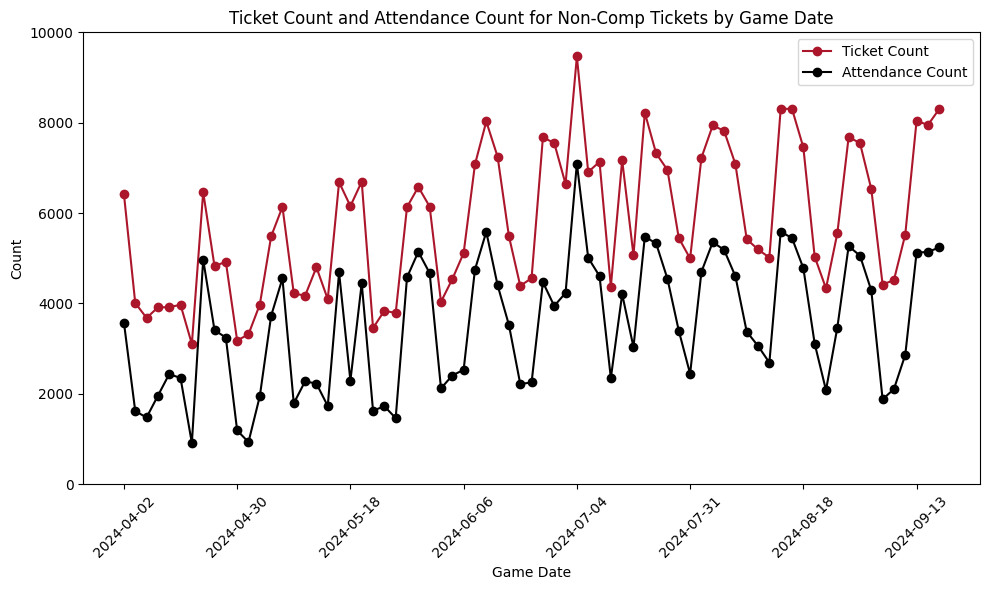

In [100]:
import matplotlib.pyplot as plt

plt.rcParams.update(plt.rcParamsDefault)

#Plot Attendance and Sales tickets together
plt.figure(figsize=(10, 6))
plt.plot(test2_df['EVENT_DATE'], test2_df['Sales_Count'], color='#ab162b', label='Ticket Count', marker='o')
plt.plot(test2_df['EVENT_DATE'], test2_df['Attendance_Count'],  color='#000000', label='Attendance Count', marker='o')

# Adding labels and title
plt.xlabel('Game Date')
plt.ylabel('Count')
plt.ylim(0, 10000)
plt.title('Ticket Count and Attendance Count for Non-Comp Tickets by Game Date')
plt.legend(['Ticket Count', 'Attendance Count'])

# Display the plot
plt.xticks(ticks=test2_df['EVENT_DATE'][::10], rotation=45)
plt.tight_layout()
plt.show()

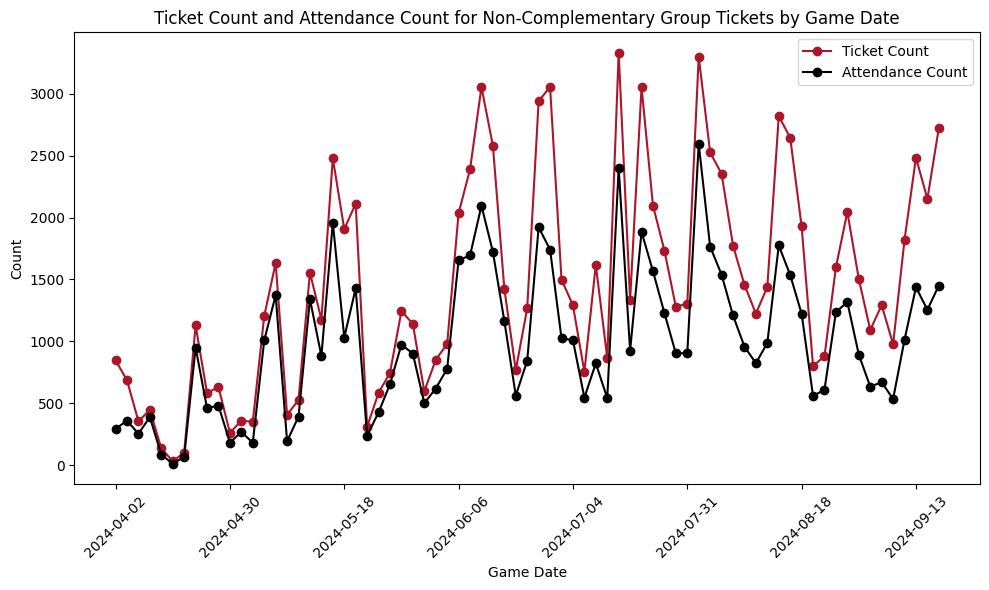

In [77]:
import matplotlib.pyplot as plt

#Plot Attendance and Sales tickets together
plt.figure(figsize=(10, 6))
plt.plot(test2_df['EVENT_DATE'], test2_df['Sales_Groups_Count'], color='#ab162b', label='Ticket Count', marker='o')
plt.plot(test2_df['EVENT_DATE'], test2_df['Attendance_Groups_Count'], color='#000000', label='Attendance Count', marker='o')

# Adding labels and title
plt.xlabel('Game Date')
plt.ylabel('Count')
plt.title('Ticket Count and Attendance Count for Non-Complementary Group Tickets by Game Date')
plt.legend()

# Display the plot
plt.xticks(ticks=test2_df['EVENT_DATE'][::10], rotation=45)
plt.tight_layout()
plt.show()

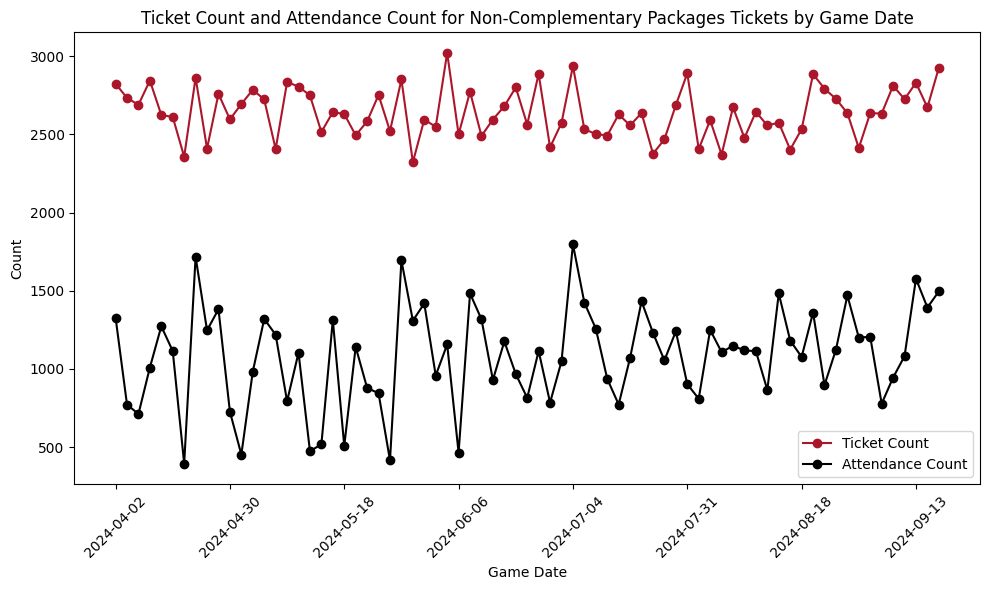

In [78]:
import matplotlib.pyplot as plt

#Plot Attendance and Sales tickets together
plt.figure(figsize=(10, 6))
plt.plot(test2_df['EVENT_DATE'], test2_df['Sales_Packages_Count'], color='#ab162b', label='Ticket Count', marker='o')
plt.plot(test2_df['EVENT_DATE'], test2_df['Attendance_Packages_Count'], color='#000000', label='Attendance Count', marker='o')

# Adding labels and title
plt.xlabel('Game Date')
plt.ylabel('Count')
plt.title('Ticket Count and Attendance Count for Non-Complementary Packages Tickets by Game Date')
plt.legend()

# Display the plot
plt.xticks(ticks=test2_df['EVENT_DATE'][::10], rotation=45)
plt.tight_layout()
plt.show()